In [1]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier
from npl.visualize.visualize import plot_cummulative_success_rate
from ase.visualize import view
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

In [2]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [3]:
from npl.calculators.top_calculator import TOPCalculator


stoichiometry = 'Pt101Au100'
stoichiometry_dict = {'Pt': 101, 'Au': 100}

top_calculator = TOPCalculator('TEC', stoichiometry)

INFO - Loading top parameters of Pt101Au100
INFO - Parameters obtained from reference: L. Vega Mater. Adv., 2021, 2, 6589-6602
INFO - Parameters loaded successfully
INFO - Parameters: 
{'AuPt': 21.0, 'Au(cn=6)': -530.0, 'Au(cn=7)': -492.0, 'Au(cn=8)': -335.0, 'Au(cn=9)': -335.0}


In [4]:
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model

n_atoms = sum(stoichiometry_dict.values())
symbols = list(stoichiometry_dict.keys())
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    top_calculator.coefficients,
    symbols, n_atoms)

top_calculator.set_coefficients(coefficients)

Coef symbol_a: Au


In [5]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(
    NeighborCountingEnvironmentCalculator(symbols), 
    symbols)

In [17]:
from npl.optimization.basin_hopping import run_basin_hopping


steps_BH, energies_BH = [], []
for i in range(20):
    start_particle = create_start_particle(7, 2, stoichiometry_dict)
    [best_particle, lowest_energies, flip_energy_list] = run_basin_hopping(start_particle,
                                                                        top_calculator, 
                                                                        total_energies, 
                                                                        100, 
                                                                        5,
                                                                        local_feature_classifier=None)
    energies_BH.append(lowest_energies[-2][0])
    steps_BH.append(lowest_energies[-2][1])
    if lowest_energies[-2][0] <= min(energies_BH):
        global_minimum = best_particle

INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 100
INFO - Hops: 5
INFO - Starting energy: -13559.373134328358


INFO - Energy after local_opt: -25850.836, lowest -25850.836
INFO - Lowest energy: -25852.612
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 100
INFO - Hops: 5
INFO - Starting energy: -11883.014925373132
INFO - Energy after local_opt: -25852.507, lowest -25852.507
INFO - Lowest energy: -25852.925
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 100
INFO - Hops: 5
INFO - Starting energy: -13895.41791044776
INFO - Energy after local_opt: -25852.507, lowest -25852.507
INFO - Lowest energy: -25852.925
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 100
INFO - Hops: 5
INFO - Starting energy: -12551.97014925373
INFO - Energy after local_opt: -25852.507, lowest -25852.507
INFO - Lowest energy: -25852.925
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 100
INFO - Hops: 5
INFO - Starting energy: -11550.5223880597
INFO - Energy after local_opt: -25849.896, lowest -25849.896
INFO - Lowest energy: -25852.925
INFO - Starting Ba

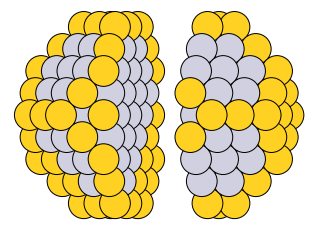

In [18]:
from npl.visualize.visualize import plot_parted_particle

plot_parted_particle(global_minimum, 3)

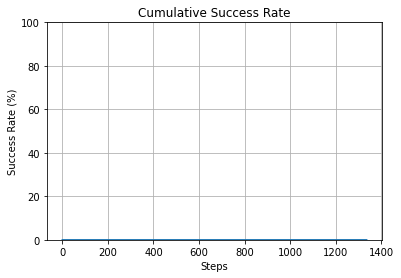

In [14]:
plot_cummulative_success_rate(energies_BH, steps_BH)

INFO - Loading top parameters of Pt101Cu100
INFO - Parameters obtained from reference: L. Vega Mater. Adv., 2021, 2, 6589-6602
INFO - Parameters loaded successfully
INFO - Parameters: 
{'CuPt': -43.0, 'Cu(cn=6)': 15.0, 'Cu(cn=7)': 208.0, 'Cu(cn=8)': 325.0, 'Cu(cn=9)': 325.0}


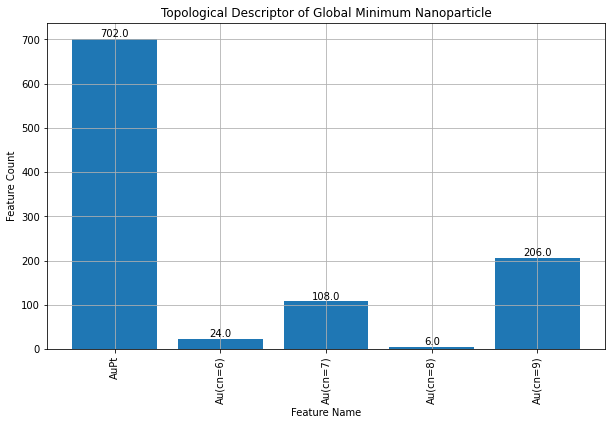

In [15]:
from npl.descriptors import TopologicalFeatureClassifier

feature_classifier = TopologicalFeatureClassifier(symbols)
feature_classifier.compute_feature_vector(global_minimum)
threshold = 1e-16
filtered_indices = [i for i, coef in enumerate(TOPCalculator('TEC', 'Pt101Cu100').coefficients) if abs(coef) > threshold]
feature_names = feature_classifier.get_feature_labels()

feature_vector = global_minimum.get_feature_vector(feature_classifier.get_feature_key())
filtered_feature_vector = [feature_vector[i] for i in filtered_indices]
filtered_feature_names = [feature_names[i] for i in filtered_indices]

# Plot the filtered feature vector
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_feature_names, filtered_feature_vector)
plt.xlabel('Feature Name')
plt.ylabel('Feature Count')
plt.title('Topological Descriptor of Global Minimum Nanoparticle')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate bars with their heights
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()